In [1]:
library(survival)
library(ggplot2)
library(dplyr)
library(reshape2)
library(stringr)

Warning message:
“package ‘survival’ was built under R version 4.0.5”
Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘reshape2’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”


In [2]:
dir_fig = 'R_clogit_pca/'

In [3]:
### clean features
fts = c('PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr', 
        'DEV_BR_GENE_10_cds + DEV_BR_GENE_10_utr', 
        'PLIp9_cds + PLIp9_utr', 
        'LOWPLI_cds + LOWPLI_utr',

        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron')
fts_labels = c('fetal brain expressed genes with pLI≥.9, exonic', 
               'fetal brain expressed genes, exonic', 
               'pLI≥.9, exonic', 
               'pLI≤.9, exonic',

               'fetal brain expressed genes with pLI≥.9, intronic',
               'fetal brain expressed genes, intronic', 
               'pLI≥.9, intronic', 
               'pLI≤.9, intronic')
fts_col_names = c('fetal_brain_genes_pli_exonic', 
                  'fetal_brain_genes_exonic', 
                  'pli_genes_exonic', 
                  'lowpli_genes_exonic', 
                  'fetal_brain_genes_pli_intronic', 
                  'fetal_brain_genes_intronic', 
                  'pli_genes_intronic', 
                  'lowpli_genes_intronic')

trs_fts = c(fts, 
            'FDR_ASD_cds + FDR_ASD_utr', 
            'FDR_ASD_intron')
trs_fts_labels = c(fts_labels, 
                   'ASD FDR, exonic',
                   'ASD FDR, intron')
trs_fts_col_names = c(fts_col_names, 
                      'asd_genes_exonic', 
                      'asd_genes_intronic')

In [4]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

In [5]:
#prs_mode = 'sbayesr'
prs_mode = 'prscs'
if (prs_mode == 'sbayesr') {
    file_main = 'combined_svs_trs_snvs_prs_pc_sbayesr.csv'
} else if (prs_mode == 'prscs') {
    file_main = 'combined_svs_trs_snvs_prs_pc_prscs.csv'}
df_main <- read.table(file_main, header = TRUE, sep = ",")
#df_main['count_PLIp9_nonLOF_DEV_BR_10_cds'] = df_main[,'count_PLIp9_DEV_BR_GENE_10_cds'] - df_main[,'count_PLIp9_LOF_DEV_BR_10_cds']
df_main[,'Platform'] <- as.factor(df_main[,'Platform'])
df_main[,'sex'] <- as.factor(df_main[,'sex'])
df_main

fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP1,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP1_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP2,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP2_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q,PRS_ASD_Z,PRS_SCZ_Z,PRS_EDU_Z,count_dnlof_inhlof
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,142,126,16,14,0,0,-0.971701072,-0.510485305,0.82162924,0
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,1,1,1,1,1,1,0.303644763,0.817056455,0.06312390,1
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,5,5,1,1,1,1,0.595643472,-0.305436874,1.94303491,2
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,0,0,0,0,0,0,1.166191828,0.943709479,-2.78896425,1
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,2,1,1,0,0,0,0.703902177,-0.152554399,0.06482359,0
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,1,0,0,0,0,0,0.384605619,0.209070495,0.16440487,0
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,3,3,2,2,1,1,-0.898010204,-0.994547648,0.53088874,1
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,1,1,1,1,1,1,-1.036073363,-1.487948561,0.29231934,1
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,3,2,2,1,1,1,0.817923575,-0.003587407,-0.08546761,1


In [6]:
file_sv_pca = 'pca_calculation/PC_data.tsv'
df_sv_pca <- read.table(file_sv_pca, header = TRUE, sep = "\t")
#df_sv_pca
#print(df_sv_pca$SAMPLE)

pca_flt_name = 'SQ70_SAMPLES'
pcs = paste0('PC', 1:10, '_', pca_flt_name)
pc_labels = paste0('PC', 1:10)
for (pc in pcs) {
    df_main[,pc] <- df_sv_pca[,pc]
}
df_main

fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,PC1_SQ70_SAMPLES,PC2_SQ70_SAMPLES,PC3_SQ70_SAMPLES,PC4_SQ70_SAMPLES,PC5_SQ70_SAMPLES,PC6_SQ70_SAMPLES,PC7_SQ70_SAMPLES,PC8_SQ70_SAMPLES,PC9_SQ70_SAMPLES,PC10_SQ70_SAMPLES
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,-3.768145,-8.1695553,-7.6715195,-3.89612274,-7.6436472,-10.061601466,-20.6255755,-16.6056831,-27.70346351,-14.1566646
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,-3.067484,-7.6249312,-10.9811878,0.37896819,-12.2715799,-15.471128998,15.5446103,-11.4537688,22.87395227,-12.5274835
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,-1.293012,-3.6616438,-0.4616614,-0.09959930,-3.1388534,-1.845197480,-2.6477250,-1.4709970,-0.12923291,-1.3564287
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,-2.919207,-5.4731892,-12.9934274,9.53501612,6.9311347,-5.867991754,82.6458221,-63.8414714,8.69436732,26.5577116
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,-2.303919,-3.0106142,-1.6332730,-0.84669600,-2.1622206,-0.353877405,1.5960842,-0.4440965,1.34801656,-0.8652154
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,-1.711257,-2.7013524,-1.6757729,-0.96290478,-2.2027718,-0.741375522,1.6852021,-0.8497756,1.44052169,-0.7395439
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,-2.037691,-5.2046640,-1.3485684,-1.03872325,-3.1075352,-0.611721458,2.8349841,-1.4962486,1.27315899,-4.2689943
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,-2.557509,-5.2333998,-1.8582260,-0.40891592,-3.0045381,-1.011158147,3.8395244,-1.0577660,0.99716755,-4.6948575
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,-1.714057,-4.6765589,-8.7105102,-4.63670554,4.5601145,4.135042653,12.1406623,-6.2530443,0.37838530,13.4254282


In [7]:
df_main_ont = df_main %>% filter(Platform == 'ONT')
df_main_pb = df_main %>% filter(Platform == 'PB')

print('ont:')
df_main_ont
print('pb:')
df_main_pb

[1] "ont:"


fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,PC1_SQ70_SAMPLES,PC2_SQ70_SAMPLES,PC3_SQ70_SAMPLES,PC4_SQ70_SAMPLES,PC5_SQ70_SAMPLES,PC6_SQ70_SAMPLES,PC7_SQ70_SAMPLES,PC8_SQ70_SAMPLES,PC9_SQ70_SAMPLES,PC10_SQ70_SAMPLES
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,-3.7681452,-8.169555,-7.67151954,-3.8961227,-7.6436472,-10.0616015,-20.6255755,-16.6056831,-27.70346351,-14.156665
F0125,REACH000154,ASD,Male,1,trio,1,1,0.007652076,-0.005627826,⋯,-3.4277273,-5.090582,-1.45054000,-2.2736821,-9.4499399,-1.5330479,2.8630821,-6.8656955,0.65117278,-1.605465
F0203,REACH000400,ASD,Male,1,trio,3,0,0.063124600,0.025317490,⋯,-4.6350230,-7.185726,89.45949696,-31.8269167,4.5188738,-4.6140690,8.7860879,0.4256749,3.23601258,5.531322
F0203,REACH000403,ASD,Male,1,trio,3,0,0.072212100,0.029487000,⋯,-4.6691227,-7.325148,97.38870873,-36.2186263,5.5586627,-4.5524507,9.8303140,1.0375855,3.65510819,7.113100
F0203,REACH000404,ASD,Female,1,trio,3,0,0.051612690,0.017961540,⋯,-4.5176526,-6.214369,88.14372394,-32.6309785,4.1173411,-4.7245971,8.4282356,0.9395262,2.73640501,6.229270
F0205,REACH000409,ASD,Female,1,trio,1,0,0.072176330,-0.020434790,⋯,-0.4737851,-4.235368,1.06780418,2.0348219,-2.8719404,-15.4916178,-14.7355451,-7.7002966,-6.77161402,-19.343529
F0205,REACH000412,CON,Female,1,trio,1,0,0.073046370,-0.018088850,⋯,-2.1178446,-5.446052,1.29250598,1.5235480,-2.8088379,-15.8145376,-16.0252519,-8.6375876,-6.04590231,-20.322808
F0205,REACH000413,CON,Female,1,trio,1,0,0.065685740,-0.016456620,⋯,-1.5109199,-4.368975,0.39962179,2.0750797,-3.5572297,-12.8512800,-13.5632654,-7.0992734,-6.02858920,-16.898725
F0206,REACH000414,ASD,Male,1,trio,1,0,0.023306320,0.008190642,⋯,-2.4017701,-3.678439,1.75608789,-1.3242253,-1.0556854,-0.6880937,-5.1707415,-1.4199562,-1.33217235,-6.139275


[1] "pb:"


fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,PC1_SQ70_SAMPLES,PC2_SQ70_SAMPLES,PC3_SQ70_SAMPLES,PC4_SQ70_SAMPLES,PC5_SQ70_SAMPLES,PC6_SQ70_SAMPLES,PC7_SQ70_SAMPLES,PC8_SQ70_SAMPLES,PC9_SQ70_SAMPLES,PC10_SQ70_SAMPLES
<chr>,<chr>,<chr>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,-3.067484,-7.6249312,-10.9811878,0.37896819,-12.2715799,-15.471128998,15.54461031,-11.4537688,22.87395227,-12.5274835
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,-1.293012,-3.6616438,-0.4616614,-0.09959930,-3.1388534,-1.845197480,-2.64772499,-1.4709970,-0.12923291,-1.3564287
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,-2.919207,-5.4731892,-12.9934274,9.53501612,6.9311347,-5.867991754,82.64582210,-63.8414714,8.69436732,26.5577116
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,-2.303919,-3.0106142,-1.6332730,-0.84669600,-2.1622206,-0.353877405,1.59608418,-0.4440965,1.34801656,-0.8652154
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,-1.711257,-2.7013524,-1.6757729,-0.96290478,-2.2027718,-0.741375522,1.68520211,-0.8497756,1.44052169,-0.7395439
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,-2.037691,-5.2046640,-1.3485684,-1.03872325,-3.1075352,-0.611721458,2.83498408,-1.4962486,1.27315899,-4.2689943
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,-2.557509,-5.2333998,-1.8582260,-0.40891592,-3.0045381,-1.011158147,3.83952445,-1.0577660,0.99716755,-4.6948575
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,-1.714057,-4.6765589,-8.7105102,-4.63670554,4.5601145,4.135042653,12.14066229,-6.2530443,0.37838530,13.4254282
F0101,REACH000120,ASD,Male,1,trio,1,1,-0.008356654,-0.006733101,⋯,-3.111238,-2.6170768,0.0620189,-1.02354729,-2.3529794,-0.918315597,0.62310498,0.2629293,0.18404120,-0.8037113


In [8]:
pcs = paste0('PC', 1:10, '_', pca_flt_name)
pcs

[1] "PC1_SQ70_SAMPLES"  "PC2_SQ70_SAMPLES"  "PC3_SQ70_SAMPLES" 
 [4] "PC4_SQ70_SAMPLES"  "PC5_SQ70_SAMPLES"  "PC6_SQ70_SAMPLES" 
 [7] "PC7_SQ70_SAMPLES"  "PC8_SQ70_SAMPLES"  "PC9_SQ70_SAMPLES" 
[10] "PC10_SQ70_SAMPLES"

In [9]:
### SVs All
PRINT_INFO = TRUE
#PRINT_INFO = FALSE

flt = 'SQ70' # file_main is built with this SV filter. if you want to change the SV filter you should regenerate the file_main

#null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
#                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (pc in pcs) {

    var = pc
    ###print(var)
    
    sum_case = sum(df_main[df_main$Phenotype==1,][,var])
    sum_control = sum(df_main[df_main$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    #model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
    #                                 PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = df_main)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = df_main)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

my_data = data.frame('pcs' = pcs, 'pc_labels' = pc_labels, 
                     'log_ORs' = log_ORs, 'log_ORs_plus' = log_ORs_plus, 'log_ORs_minus' = log_ORs_minus, 
                     'ano_pval' = ano_pvals, 
                     'sum_case_con' = sum_case_controls)

[1] "no extra covariates......................."
[1] "ORs:"
 [1] 1.1187821 0.8995267 0.9287561 0.8898737 0.9128931 0.9719075 0.9989044
 [8] 1.0098521 0.9451558 1.0100802
[1] "ORs_plus:"
 [1] 1.329566 1.066099 1.029446 1.041016 1.055049 1.110596 1.136761 1.118856
 [9] 1.089327 1.160142
[1] "ORs_minus:"
 [1] 0.9414149 0.7589804 0.8379147 0.7606752 0.7898914 0.8505381 0.8777655
 [8] 0.9114682 0.8200656 0.8794287
[1] "log_ORs:"
 [1]  0.112240646 -0.105886527 -0.073909078 -0.116675744 -0.091136512
 [6] -0.028494593 -0.001096241  0.009803885 -0.056405460  0.010029724
[1] "log_ORs_plus:"
 [1]  0.20030961 -0.01920494 -0.02139287 -0.03663701 -0.01729674  0.03956355
 [7]  0.06486393  0.06210201  0.01602722  0.08070067
[1] "log_ORs_minus:"
 [1]  0.02417168 -0.19256811 -0.12642528 -0.19671448 -0.16497629 -0.09655274
 [7] -0.06705641 -0.04249424 -0.12883813 -0.06064122
[1] "pvals:"
 [1] 0.2024993 0.2218751 0.1593214 0.1449119 0.2171109 0.6754499 0.9867400
 [8] 0.8512988 0.4361391 0.8871420
[1] "ano

In [10]:
### SVs ONT
PRINT_INFO = TRUE
#PRINT_INFO = FALSE

flt = 'SQ70' # file_main is built with this SV filter. if you want to change the SV filter you should regenerate the file_main

#null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
#                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (pc in pcs) {

    var = pc
    ###print(var)
    
    sum_case = sum(df_main[df_main$Phenotype==1,][,var])
    sum_control = sum(df_main[df_main$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    #model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
    #                                 PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = df_main_ont)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = df_main_ont)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

my_data_all_ont = cbind(my_data, data.frame('log_ORs_ont' = log_ORs, 'log_ORs_plus_ont' = log_ORs_plus, 'log_ORs_minus_ont' = log_ORs_minus, 
                     'ano_pval_ont' = ano_pvals, 
                     'sum_case_con_ont' = sum_case_controls))

[1] "no extra covariates......................."
[1] "ORs:"
 [1] 1.5817374 0.9513752 0.9350474 1.0809118 0.8914491 0.9715776 0.8178088
 [8] 0.8632679 0.6744493 1.0149972
[1] "ORs_plus:"
 [1] 2.644452 1.083699 1.077936 1.410511 1.130676 1.194207 1.319753 1.270295
 [9] 1.201310 1.239354
[1] "ORs_minus:"
 [1] 0.9460913 0.8352087 0.8110996 0.8283314 0.7028377 0.7904516 0.5067700
 [8] 0.5866601 0.3786549 0.8312549
[1] "log_ORs:"
 [1]  0.45852385 -0.04984673 -0.06715804  0.07780490 -0.11490691 -0.02883417
 [7] -0.20112672 -0.14703023 -0.39385871  0.01488587
[1] "log_ORs_plus:"
 [1]  0.720742960  0.016596799  0.005397593  0.213596588  0.006382273
 [6]  0.076431365  0.043046782  0.050054708 -0.099327155  0.116777873
[1] "log_ORs_minus:"
 [1]  0.19630474 -0.11629025 -0.13971368 -0.05798679 -0.23619609 -0.13409970
 [7] -0.44530022 -0.34411517 -0.68839026 -0.08700613
[1] "pvals:"
 [1] 0.08035523 0.45312707 0.35464998 0.56666334 0.34344533 0.78414731
 [7] 0.41010770 0.45565250 0.18114505 0.8838467

In [11]:
### SVs PB
PRINT_INFO = TRUE
#PRINT_INFO = FALSE

flt = 'SQ70' # file_main is built with this SV filter. if you want to change the SV filter you should regenerate the file_main

#null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
#                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')

### no extra covariates...
print('no extra covariates.......................')
ORs = c()
ORs_plus = c()
ORs_minus = c()
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()
ano_pvals = c()
sum_cases = c()
sum_controls = c()
for (pc in pcs) {

    var = pc
    ###print(var)
    
    sum_case = sum(df_main[df_main$Phenotype==1,][,var])
    sum_control = sum(df_main[df_main$Phenotype==0,][,var])
    sum_cases = c(sum_cases, sum_case)
    sum_controls = c(sum_controls, sum_control)
        
    #model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + 
    #                                 PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    model_formula = as.formula(paste('Phenotype ~', var, '+ sex + MEAN_COVERAGE + count_dnlof_inhlof + PRS_ASD_Z +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
        
    null_model <- clogit(null_formula, data = df_main_pb)
    #print(summary(null_model))
    
    clogit_model <- clogit(model_formula, data = df_main_pb)
    #print(summary(clogit_model))
    #print(str(summary(clogit_model)))
    OR = summary(clogit_model)$conf.int[var, 'exp(coef)']
    OR_plus = summary(clogit_model)$conf.int[var, 'upper .95']
    OR_minus = summary(clogit_model)$conf.int[var, 'lower .95']
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    ORs = c(ORs, OR)
    ORs_plus = c(ORs_plus, OR_plus)
    ORs_minus = c(ORs_minus, OR_minus)
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
        
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]
    ano_pvals = c(ano_pvals, ano_pval)
}

sum_case_controls = paste(as.character(sum_cases), as.character(sum_controls), sep='/')

if (PRINT_INFO) {
    print('ORs:')
    print(ORs)
    print('ORs_plus:')
    print(ORs_plus)
    print('ORs_minus:')
    print(ORs_minus)
    print('log_ORs:')
    print(log_ORs)
    print('log_ORs_plus:')
    print(log_ORs_plus)
    print('log_ORs_minus:')
    print(log_ORs_minus)
    print('pvals:')
    print(pvals)
    print('ano_pvals:')
    print(ano_pvals)
    print('sum_cases:')
    print(sum_cases)
    print('sum_controls:')
    print(sum_controls)
    print('sum_case_controls:')
    print(sum_case_controls)
}

my_data_all_ont_pb = cbind(my_data_all_ont, data.frame('log_ORs_pb' = log_ORs, 'log_ORs_plus_pb' = log_ORs_plus, 'log_ORs_minus_pb' = log_ORs_minus, 
                     'ano_pval_pb' = ano_pvals, 
                     'sum_case_con_pb' = sum_case_controls))

[1] "no extra covariates......................."
[1] "ORs:"
 [1] 0.7541330 0.7397861 0.7235624 0.6677678 0.8176847 1.0127659 1.0712839
 [8] 1.0381741 0.9467162 1.0172696
[1] "ORs_plus:"
 [1] 1.931199 1.006013 1.112520 1.036888 1.167262 1.508355 1.327151 1.165836
 [9] 1.110276 1.387631
[1] "ORs_minus:"
 [1] 0.2944888 0.5440125 0.4705915 0.4300502 0.5728003 0.6800087 0.8647464
 [8] 0.9244918 0.8072511 0.7457582
[1] "log_ORs:"
 [1] -0.28218651 -0.30139414 -0.32356844 -0.40381472 -0.20127853  0.01268506
 [7]  0.06885785  0.03746346 -0.05475588  0.01712215
[1] "log_ORs_plus:"
 [1]  0.19758134 -0.14456018 -0.10407643 -0.17930109 -0.01967336  0.21592077
 [7]  0.17813375  0.09663526  0.02655407  0.17553121
[1] "log_ORs_minus:"
 [1] -0.76195436 -0.45822811 -0.54306045 -0.62832834 -0.38288369 -0.19055065
 [7] -0.04041806 -0.02170835 -0.13606583 -0.14128690
[1] "pvals:"
 [1] 0.55641616 0.05463845 0.14043595 0.07207880 0.26771914 0.95023195
 [7] 0.52861061 0.52664861 0.50067909 0.91392570
[1] "ano

In [22]:
my_data_all_ont_pb

pcs,pc_labels,log_ORs,log_ORs_plus,log_ORs_minus,ano_pval,sum_case_con,log_ORs_ont,log_ORs_plus_ont,log_ORs_minus_ont,ano_pval_ont,sum_case_con_ont,log_ORs_pb,log_ORs_plus_pb,log_ORs_minus_pb,ano_pval_pb,sum_case_con_pb
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
PC1_SQ70_SAMPLES,PC1,0.3538745168,0.54222714,0.16552189,0.04533428,46.8900378137431/-46.890037813743,0.803521035,1.171926391,0.43511568,0.01357762,46.8900378137431/-46.890037813743,0.63746363,1.15003072,0.12489653,0.221788782,46.8900378137431/-46.890037813743
PC2_SQ70_SAMPLES,PC2,0.3266020793,0.48274516,0.17045900,0.02134782,217.714733021438/-217.714733021438,0.437459231,0.723753469,0.15116499,0.04565529,217.714733021438/-217.714733021438,0.42027603,0.64028157,0.20027049,0.047007522,217.714733021438/-217.714733021438
PC3_SQ70_SAMPLES,PC3,-0.1763724189,-0.07342099,-0.27932385,0.01802613,-31.5129889130772/31.5129889130771,-0.087533835,0.003450708,-0.17851838,0.25939128,-31.5129889130772/31.5129889130771,-0.36646543,-0.08871943,-0.64421143,0.006638454,-31.5129889130772/31.5129889130771
PC4_SQ70_SAMPLES,PC4,-0.0161551016,0.02628555,-0.05859575,0.69529401,-44.2703932014803/44.2703932014804,-0.070372692,0.005652678,-0.14639806,0.19318868,-44.2703932014803/44.2703932014804,0.22602134,0.36883790,0.08320479,0.092543375,-44.2703932014803/44.2703932014804
PC5_SQ70_SAMPLES,PC5,-0.0148224537,0.03536855,-0.06501346,0.77519920,16.2246602600715/-16.2246602600715,0.427932546,0.727870728,0.12799436,0.12617751,16.2246602600715/-16.2246602600715,-0.02415587,0.03093569,-0.07924744,0.675423680,16.2246602600715/-16.2246602600715
PC6_SQ70_SAMPLES,PC6,0.0073758009,0.05377481,-0.03902321,0.87256725,-23.6006058521868/23.6006058521867,0.102040098,0.228230412,-0.02415022,0.42377920,-23.6006058521868/23.6006058521867,-0.01410204,0.03271745,-0.06092153,0.767227852,-23.6006058521868/23.6006058521867
PC7_SQ70_SAMPLES,PC7,-0.0430653000,0.01255524,-0.09868584,0.45009957,95.7882096821942/-95.7882096821942,-0.055060662,0.016334411,-0.12645573,0.45527356,95.7882096821942/-95.7882096821942,0.04508996,0.15102647,-0.06084655,0.677498654,95.7882096821942/-95.7882096821942
PC8_SQ70_SAMPLES,PC8,0.0160805935,0.06640844,-0.03424725,0.74433778,110.074203107924/-110.074203107924,0.047994412,0.135088978,-0.03910016,0.56402810,110.074203107924/-110.074203107924,-0.02473543,0.03719875,-0.08666961,0.696438991,110.074203107924/-110.074203107924
PC9_SQ70_SAMPLES,PC9,-0.0001561069,0.03813910,-0.03845131,0.99674794,42.2154249780046/-42.2154249780045,-0.112823109,-0.004211021,-0.22143520,0.27208925,42.2154249780046/-42.2154249780045,0.04308418,0.11173845,-0.02557008,0.483196263,42.2154249780046/-42.2154249780045


[1] "R_clogit_pca/PCs_SQ70_SAMPLES.png"


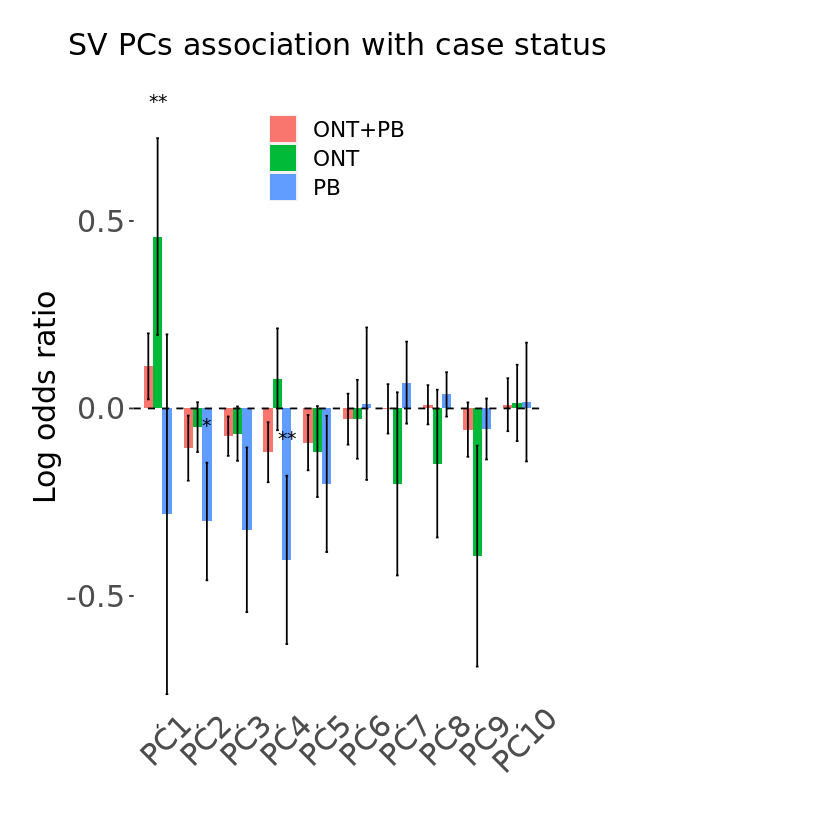

In [12]:
# plot SVs
my_data_sub.melt = melt(my_data_all_ont_pb, id.vars = c('pcs', 'pc_labels', 
                                                         'log_ORs_plus', 'log_ORs_minus', 
                                                         'ano_pval', 
                                                         'sum_case_con', 
                                                         'log_ORs_plus_ont', 'log_ORs_minus_ont', 
                                                         'ano_pval_ont', 
                                                         'sum_case_con_ont',
                                                         'log_ORs_plus_pb', 'log_ORs_minus_pb', 
                                                         'ano_pval_pb', 
                                                         'sum_case_con_pb'), 
                        variable.name = 'lor_type', value.name = 'log_ORs')

my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_plus = ifelse(lor_type=='log_ORs', log_ORs_plus,
                                                                             ifelse(lor_type=='log_ORs_ont', log_ORs_plus_ont, 
                                                                                           ifelse(lor_type=='log_ORs_pb', log_ORs_plus_pb, '.'))))
my_data_sub.melt[,'log_ORs_plus'] <- as.double(my_data_sub.melt[,'log_ORs_plus'])

my_data_sub.melt <- transform(my_data_sub.melt, log_ORs_minus = ifelse(lor_type=='log_ORs', log_ORs_minus,
                                                                             ifelse(lor_type=='log_ORs_ont', log_ORs_minus_ont, 
                                                                                           ifelse(lor_type=='log_ORs_pb', log_ORs_minus_pb, '.'))))
my_data_sub.melt[,'log_ORs_minus'] <- as.double(my_data_sub.melt[,'log_ORs_minus'])

my_data_sub.melt <- transform(my_data_sub.melt, ano_pval = ifelse(lor_type=='log_ORs', ano_pval,
                                                                             ifelse(lor_type=='log_ORs_ont', ano_pval_ont, 
                                                                                           ifelse(lor_type=='log_ORs_pb', ano_pval_pb, '.'))))
my_data_sub.melt[,'ano_pval'] <- as.double(my_data_sub.melt[,'ano_pval'])

sig <- sapply(my_data_sub.melt$ano_pval, get_pval_char)
my_data_sub.melt$sig = sig
#my_data_sub.melt

size_txt = 18
size_sig = 4
ylim_min = -0.1
ylim_max = 1.5

#geom_text(aes(label = tr_ntr), position=position_dodge(width=0.9), angle=90, hjust=0, vjust=0.5, size=2) +
#plot.margin = margin(t = 1.5, l = 1.5, r = 1, b = 1, "cm"),

base <- ggplot(my_data_sub.melt, aes(x = pcs, y = log_ORs, fill = lor_type, ymin=log_ORs_minus , ymax=log_ORs_plus)) +
  geom_bar(position = position_dodge(width=0.7), stat = "identity", width = 0.7) +
  geom_errorbar(position = position_dodge(width=0.7), aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  geom_text(aes(label = sig, y = log_ORs_plus+0.1), position=position_dodge(width=0.7), angle=0, hjust=.5, vjust=.5, size=size_sig) +
  labs(y = "Log odds ratio", title = 'SV PCs association with case status') +
  theme(axis.text=element_text(size=size_txt),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust=0.5, size=size_txt),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size=size_txt),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5, size=size_txt), 
        legend.position = c(.5, 0.9),
        legend.text = element_text(size=size_txt-5),
        legend.title = element_text(size=size_txt),
        plot.margin = margin(20, 180, 20, 20) # Add margins: top, right, bottom, left (in points)
        ) +
  scale_x_discrete(limits=pcs, labels=pc_labels) +
  #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
  scale_fill_discrete(name = '', labels = c("ONT+PB", "ONT", "PB"))
  #scale_fill_manual(name = 'Subjects', labels = c("combined", "excluding case subjects with dnLOF, dnMIS and InhLOF SNVs/indels"), values=c("khaki", "indianred1")) +

#if (i_plot != 5) { base <- base + ylim(c(ylim_min, ylim_max)) } else {base <- base + ylim(c(ylim_min, 2))}
#base <- base + ylim(c(ylim_min, ylim_max))

fig_name = paste0(dir_fig, 'PCs_', pca_flt_name, ".png")
print(fig_name)
print(base)
ggsave(fig_name, width = 10, height = 8)